In [1]:
using DataFrames
using Gadfly
using Compose
using Cairo
set_default_plot_size(30cm, 12cm)

In [2]:
# Get ready
home = "/home/german/labo/17/2pdz/"

"/home/german/labo/17/2pdz/"

In [3]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/lig/", i, "corta_temp_lig"))[:, 2]
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta_lig = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_lig = DataFrame(T = T_corta_lig, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/lig/", i, "larga_temp_lig"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga_lig = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_lig = DataFrame(T = T_larga_lig, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_lig = DataFrame(T = [ T_corta_lig ; T_larga_lig ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

LoadError: [91mSystemError: opening file /home/german/labo/17/2pdz/run/lb/neq/temperatura/lig/1corta_temp_lig: No such file or directory[39m

In [4]:
T_corta_each_aa = Array{Float64, 2}(2000, 8)
for j = 1:8
    T_mat_each_aa = Array{Float64, 2}(2000, 400)
    for i = 1:400
        # Read temperature
        T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/each_aa/corta/", i, "corta_temp_each_aa", j+124))[:, 2]
        T_mat_each_aa[:, i] = T_vec_corta
    end
    # Get the averages
    T_corta_each_aa[:, j] = reshape(mapslices(x -> mean(x), T_mat_each_aa, 2), size(T_mat_each_aa)[1]);
end
T_corta = reshape(T_corta_each_aa, 2000*8);

# Compile into a data frame
df_T_corta_lig_aa = DataFrame(T = T_corta, Time = repeat(collect(0.0005:0.0005:1), outer = [8]),
    Residue = repeat(collect(125:132), inner = [2000]))

###
# Larga
###

T_larga_each_aa = Array{Float64, 2}(180, 8)
for j = 1:8
    T_mat_each_aa = Array{Float64, 2}(180, 400)
    for i = 1:400
        # Read temperature
        T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/each_aa/larga/", i, "larga_temp_each_aa", j+124))[:, 2]
        T_mat[:, i] = T_vec_larga
    end
    # Get the averages
    T_larga_each_aa[:, j] = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);
end
T_larga = reshape(T_larga_each_aa, 180*8);

# Compile into a data frame
df_T_larga_lig_aa = DataFrame(T = T_larga, Time = repeat(collect(1.05:0.05:10), outer = [8]),
    Residue = repeat(collect(125:132), inner = [180]));

###
# Todo
###
df_T_lig_aa = DataFrame(T = [ T_corta ; T_larga ], 
    Time = [ repeat(collect(0.0005:0.0005:1), outer = [8]) ; repeat(collect(1.05:0.05:10), outer = [8]) ],
    Residue = [ repeat(collect(125:132), inner = [2000]) ; repeat(collect(125:132), inner = [180]) ]);

###
# Todo + ligando entero
###
T_corta_each_aa = [ T_corta_each_aa T_corta_lig ]
T_corta = reshape(T_corta_each_aa, 2000*9);
T_larga_each_aa = [ T_larga_each_aa T_larga_lig ]
T_larga = reshape(T_larga_each_aa, 180*9);


df_T_ligaa = DataFrame(T = [ T_corta ; T_larga ],
    Time = [ repeat(collect(0.0005:0.0005:1), outer = [9]) ; repeat(collect(1.05:0.05:10), outer = [9]) ],
    Residue = [ repeat([ collect(125:132); "LIG" ], inner = [2000]) ;
        repeat([ collect(125:132); "LIG" ], inner = [180]) ]);

LoadError: [91mSystemError: opening file /home/german/labo/17/2pdz/run/lb/neq/temperatura/each_aa/corta/1corta_temp_each_aa125: No such file or directory[39m

In [4]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/1sse/", i, "corta_temp_1sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_1sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/1sse/", i, "larga_temp_1sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_1sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_1sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [5]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/2sse/", i, "corta_temp_2sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_2sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/2sse/", i, "larga_temp_2sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_2sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_2sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [6]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/3sse/", i, "corta_temp_3sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_3sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/3sse/", i, "larga_temp_3sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_3sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_3sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [7]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/4sse/", i, "corta_temp_4sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_4sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/4sse/", i, "larga_temp_4sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_4sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_4sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [8]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/5sse/", i, "corta_temp_5sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_5sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/5sse/", i, "larga_temp_5sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_5sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_5sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [9]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/6sse/", i, "corta_temp_6sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_6sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/6sse/", i, "larga_temp_6sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_6sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_6sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [10]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/7sse/", i, "corta_temp_7sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_7sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/7sse/", i, "larga_temp_7sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_7sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_7sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [11]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/8sse/", i, "corta_temp_8sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_8sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/8sse/", i, "larga_temp_8sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_8sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_8sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [12]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/9sse/", i, "corta_temp_9sse"))[:, 2]    
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_9sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/9sse/", i, "larga_temp_9sse"))[:, 2] 
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_9sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_9sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [13]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/10sse/", i, "corta_temp_10sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_10sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/10sse/", i, "larga_temp_10sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_10sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_10sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [14]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/11sse/", i, "corta_temp_11sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_11sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/11sse/", i, "larga_temp_11sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_11sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_11sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [15]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/12sse/", i, "corta_temp_12sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_12sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/12sse/", i, "larga_temp_12sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_12sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_12sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [16]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/13sse/", i, "corta_temp_13sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_13sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/13sse/", i, "larga_temp_13sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_13sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_13sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [17]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/14sse/", i, "corta_temp_14sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_14sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/14sse/", i, "larga_temp_14sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_14sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_14sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [18]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/15sse/", i, "corta_temp_15sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_15sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/15sse/", i, "larga_temp_15sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_15sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_15sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

In [19]:
###
# Corta
###
T_mat = Array{Float64, 2}(2000, 400)
for i = 1:400
    # Read temperature
    T_vec_corta = readdlm(string(home, "run/lb/neq/temperatura/16sse/", i, "corta_temp_16sse"))[:, 2]  
    T_mat[:, i] = T_vec_corta
end

# Get the averages
T_corta = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_corta_16sse = DataFrame(T = T_corta, Time = collect(0.0005:0.0005:1))

###
# Larga
###
T_mat = Array{Float64, 2}(180, 400)
for i = 1:400
    # Read temperature
    T_vec_larga = readdlm(string(home, "run/lb/neq/temperatura/16sse/", i, "larga_temp_16sse"))[:, 2]
    T_mat[:, i] = T_vec_larga
end

# Get the averages
T_larga = reshape(mapslices(x -> mean(x), T_mat, 2), size(T_mat)[1]);

# Compile into a data frame
df_T_larga_16sse = DataFrame(T = T_larga, Time = collect(1.05:0.05:10))

###
# Todo
###
df_T_16sse = DataFrame(T = [ T_corta ; T_larga ], Time = [ collect(0.0005:0.0005:1) ; collect(1.05:0.05:10) ]);

## Ligand

In [5]:
pdf_T_lig = plot(df_T_lig, Geom.line, x="Time", y="T",
Guide.title("NEQ run (0-1)ps. Ligand Temperature"),
Coord.cartesian(ymin = 1000, ymax = 3000, xmax = 10),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

LoadError: [91mUndefVarError: df_T_lig not defined[39m

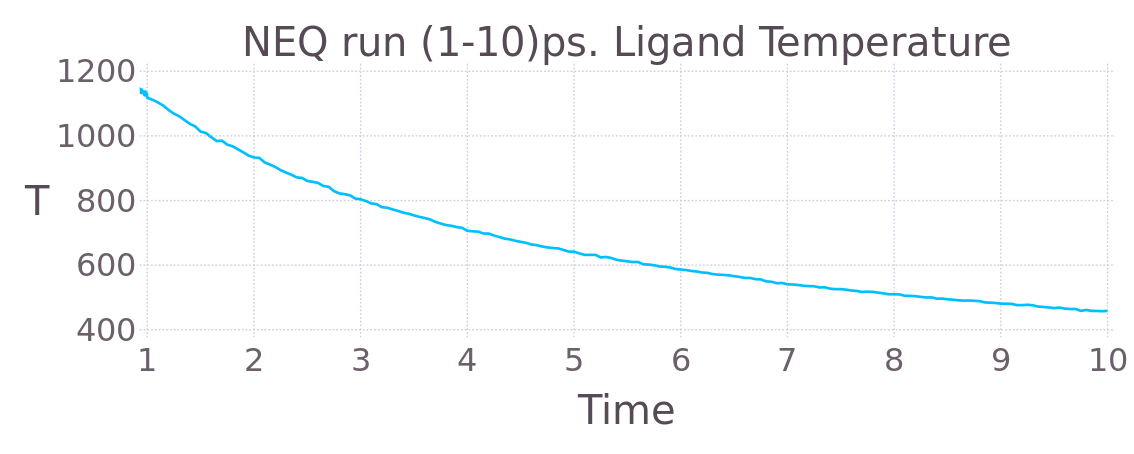

In [23]:
pdf_T_lig = plot(df_T_lig, Geom.line, x="Time", y="T",
Guide.title("NEQ run (1-10)ps. Ligand Temperature"),
Coord.cartesian(ymin = 400, ymax = 1200, xmax = 10, xmin = 1),
Guide.yticks(ticks = collect(400:200:1200)),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

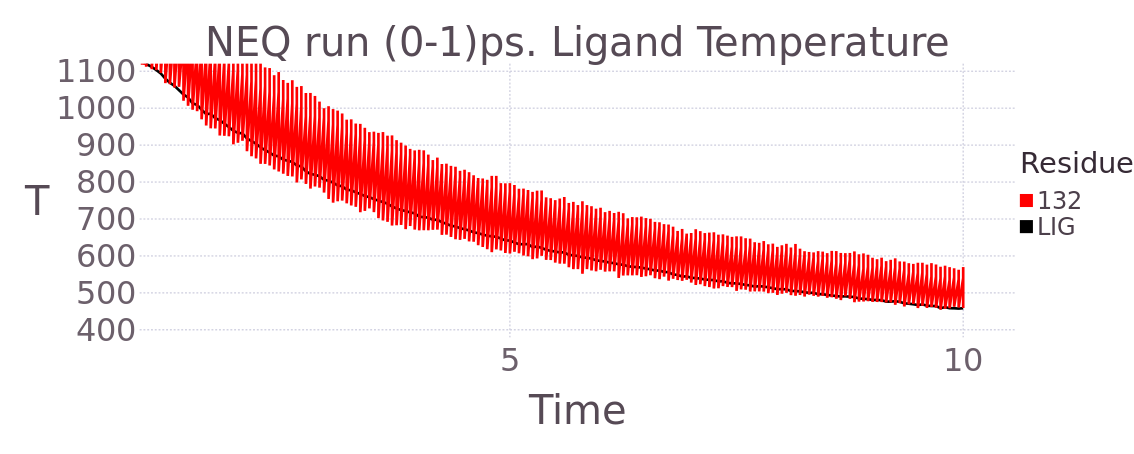

In [102]:
pdf_T_ligaa = plot(df_T_ligaa, Geom.line, x="Time", y="T", color = "Residue",
Guide.title("NEQ run (0-1)ps. Ligand Temperature"),
Coord.cartesian(ymin = 400, ymax =1100, xmin = 1, xmax = 10.5),
#Scale.color_discrete(),
Scale.color_discrete_manual("red", "red", "red", "red", "red", "red", "red", "red", "black"),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))                                                      

## SSE 1 β sheet 1

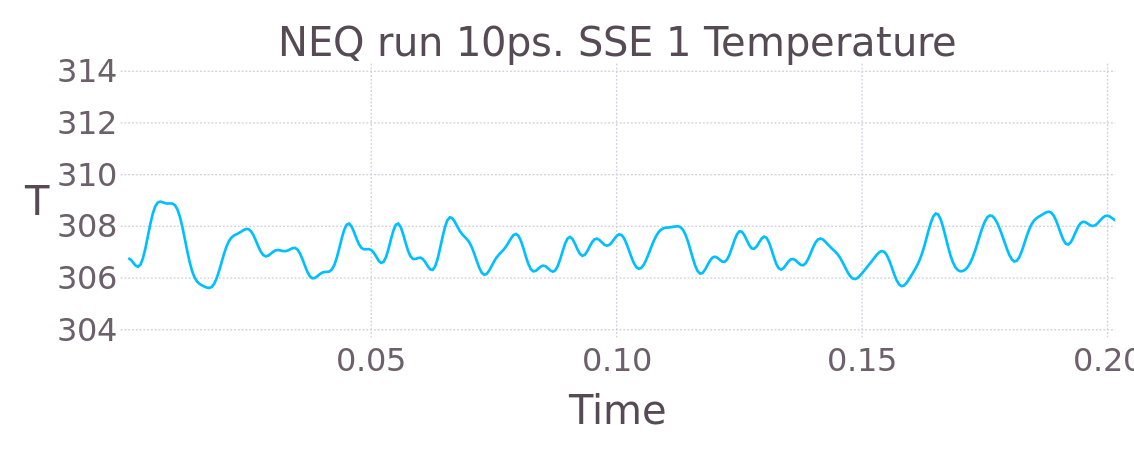

In [21]:
pdf_T_1sse = plot(df_T_1sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 1 Temperature"), 
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 2 β sheet a

In [22]:
pdf_T_2sse = plot(df_T_2sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 2 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 3 β sheet b

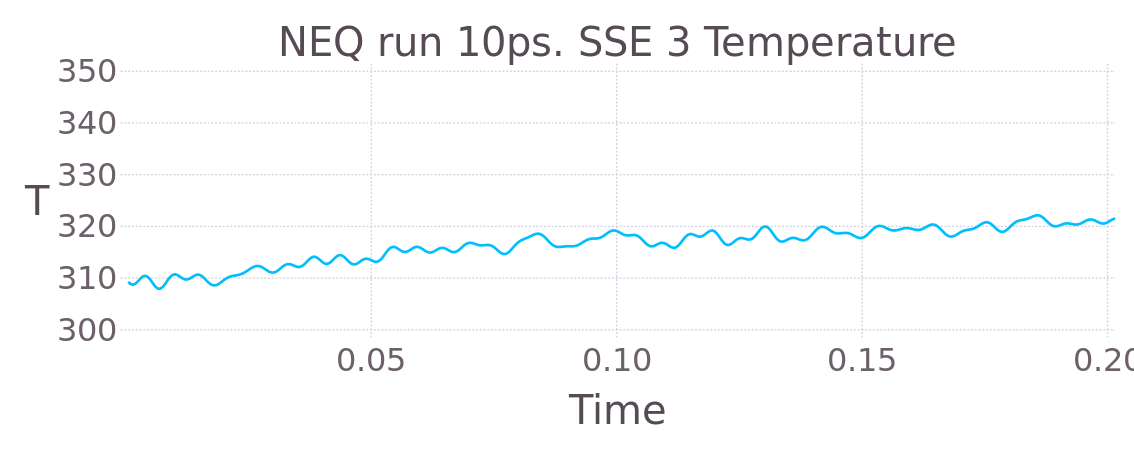

In [23]:
pdf_T_3sse = plot(df_T_3sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 3 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))  

## SSE 4 loop

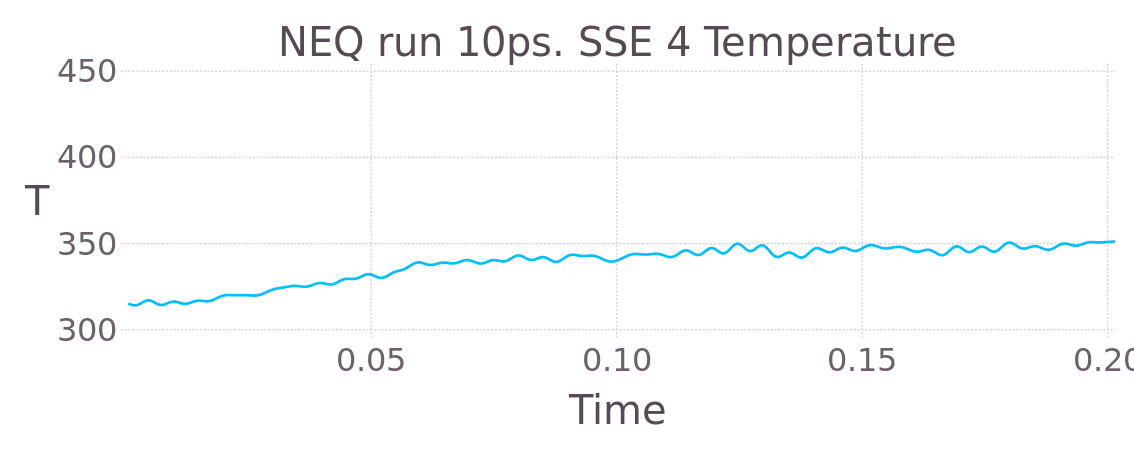

In [24]:
pdf_T_4sse = plot(df_T_4sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 4 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 5 β sheet 2

In [25]:
pdf_T_5sse = plot(df_T_5sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 5 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 6 loop

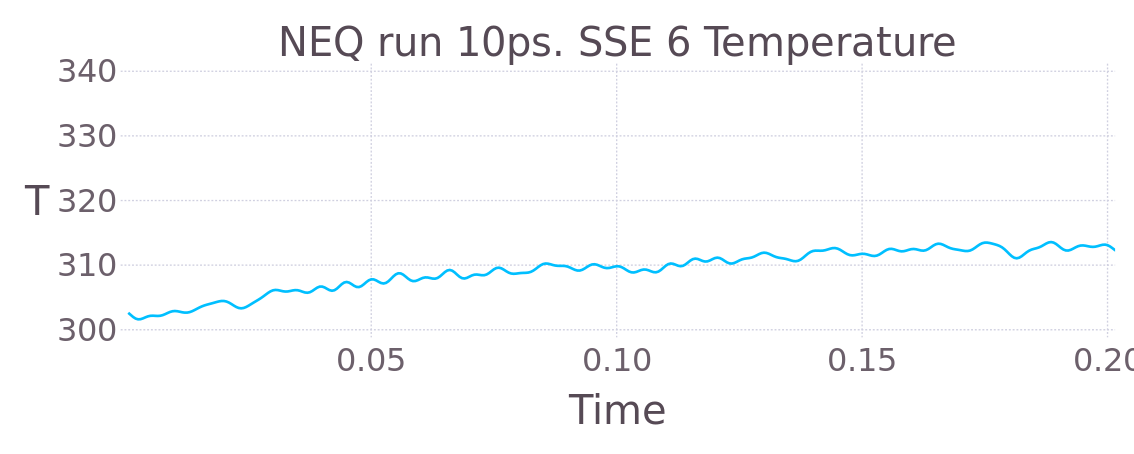

In [26]:
pdf_T_6sse = plot(df_T_6sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 6 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))  

## SSE 7 β sheet 3

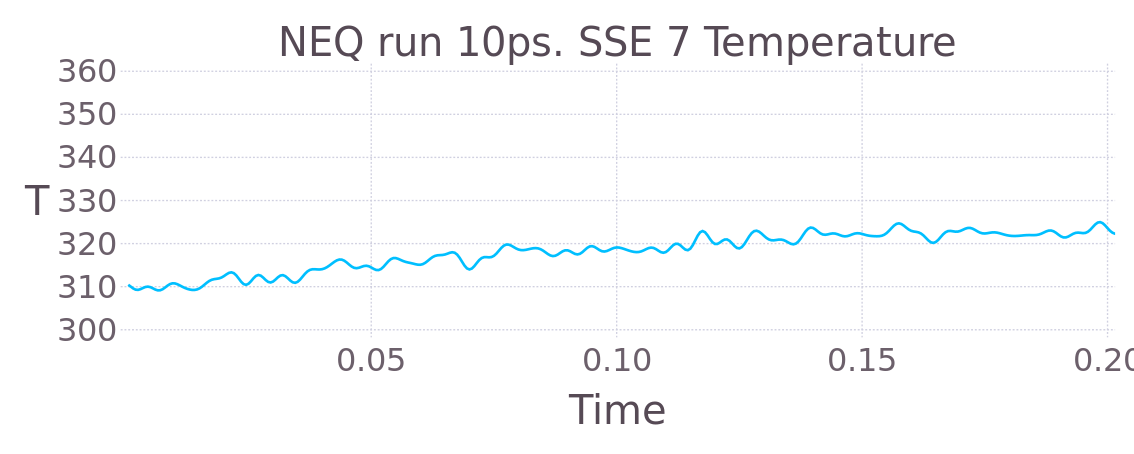

In [27]:
pdf_T_7sse = plot(df_T_7sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 7 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 8 β loop

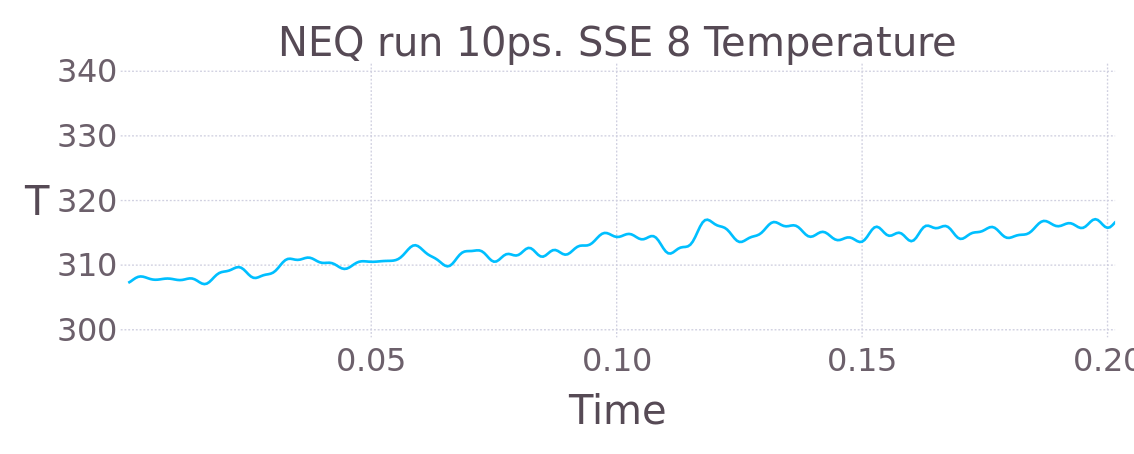

In [28]:
pdf_T_8sse = plot(df_T_8sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 8 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))

## SSE 9 α helix 1

In [29]:
pdf_T_9sse = plot(df_T_9sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 9 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 10 loop

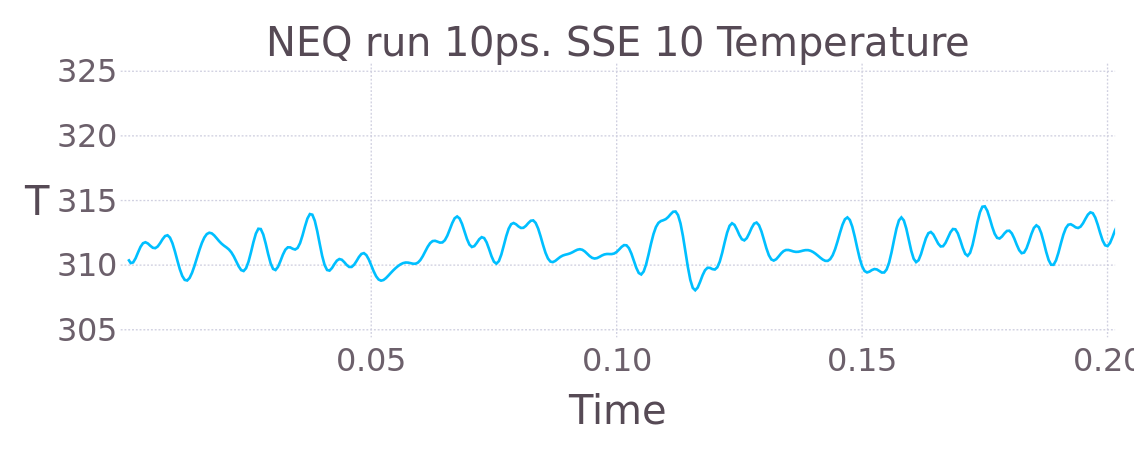

In [30]:
pdf_T_10sse = plot(df_T_10sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 10 Temperature"), Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))       

## SSE 11 β sheet 4

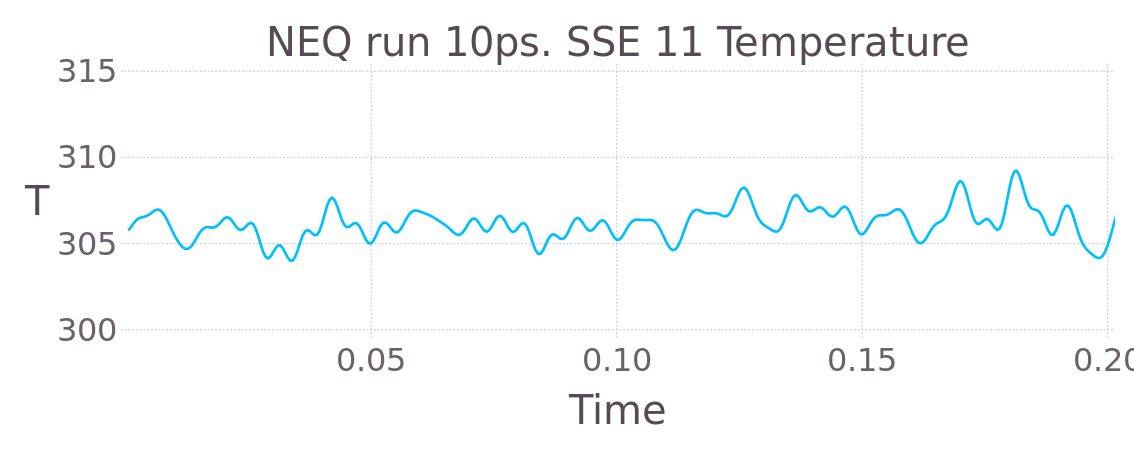

In [31]:
pdf_T_11sse = plot(df_T_11sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 11 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))     

## SSE 12 β sheet 5

In [32]:
pdf_T_12sse = plot(df_T_12sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 12 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 13 loop

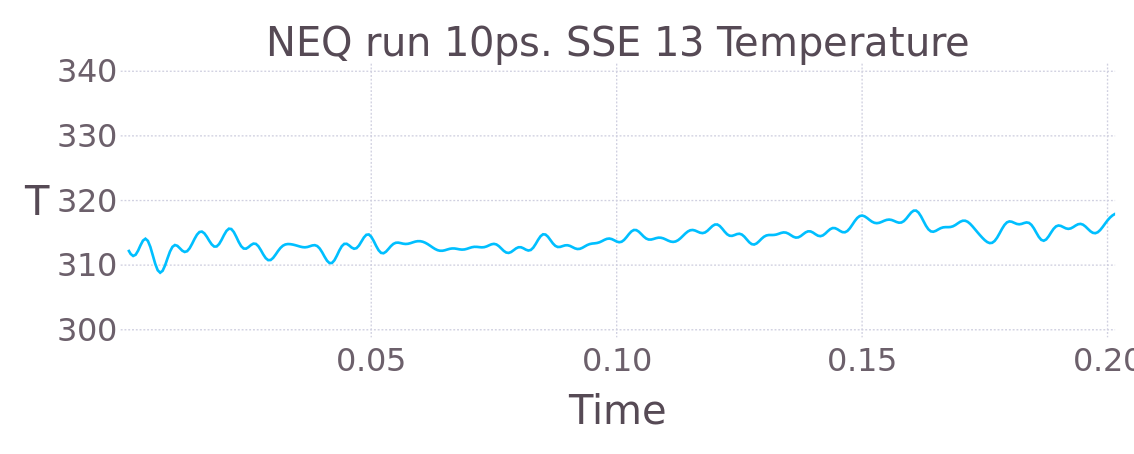

In [33]:
pdf_T_13sse = plot(df_T_13sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 13 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 14 α helix 2

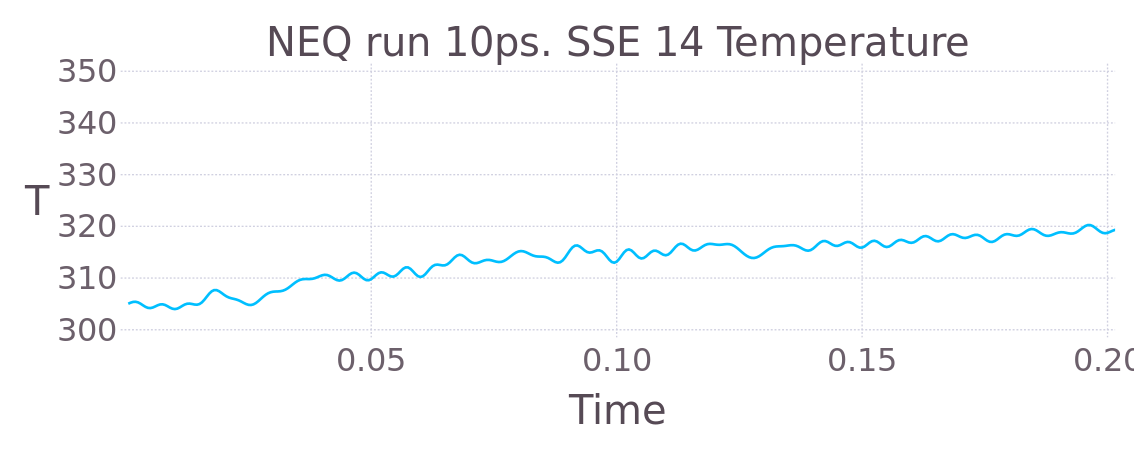

In [34]:
pdf_T_14sse = plot(df_T_14sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 14 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt))  

## SSE 15 loop

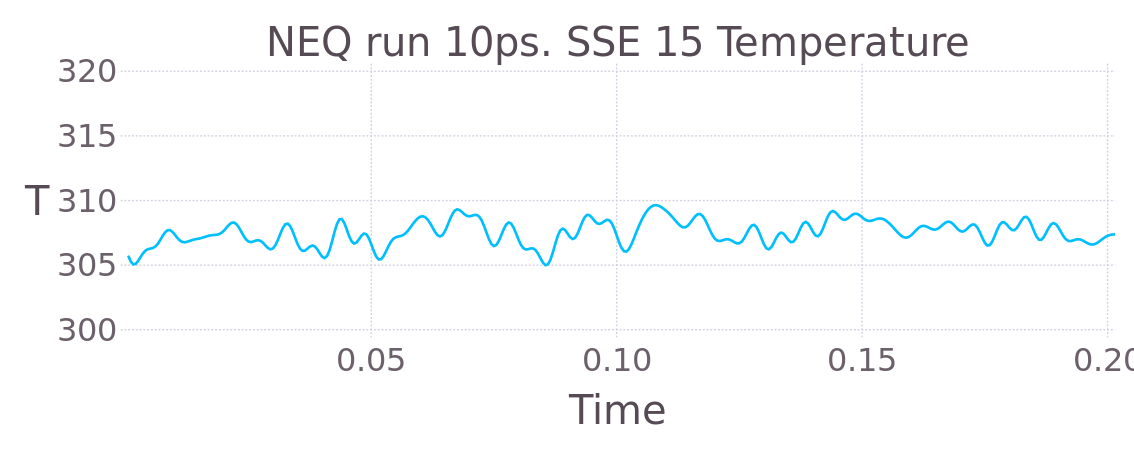

In [35]:
pdf_T_15sse = plot(df_T_15sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 15 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 

## SSE 16 β sheet 6

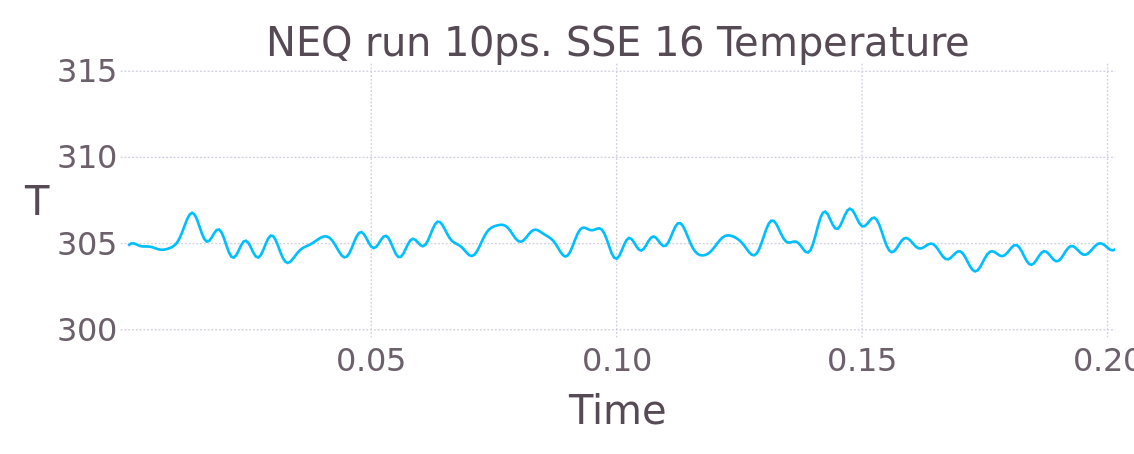

In [36]:
pdf_T_16sse = plot(df_T_16sse, Geom.line, x="Time", y="T",
Guide.title("NEQ run 10ps. SSE 16 Temperature"),
Coord.cartesian(xmax = 0.2),
Theme(line_width = 2pt, grid_line_width = 1pt,
minor_label_font_size = 24pt, major_label_font_size = 30pt, key_label_font_size = 18pt,
key_title_font_size = 22pt)) 